### 통계적 회귀

#### 회귀를 통해 이해하는 cost function

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
data_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/ecommerce.csv'
data = pd.read_csv(data_url)

In [52]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [53]:
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [54]:
# 필요없는 컬럼 삭제
data.drop(['Email', 'Address', 'Avatar'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


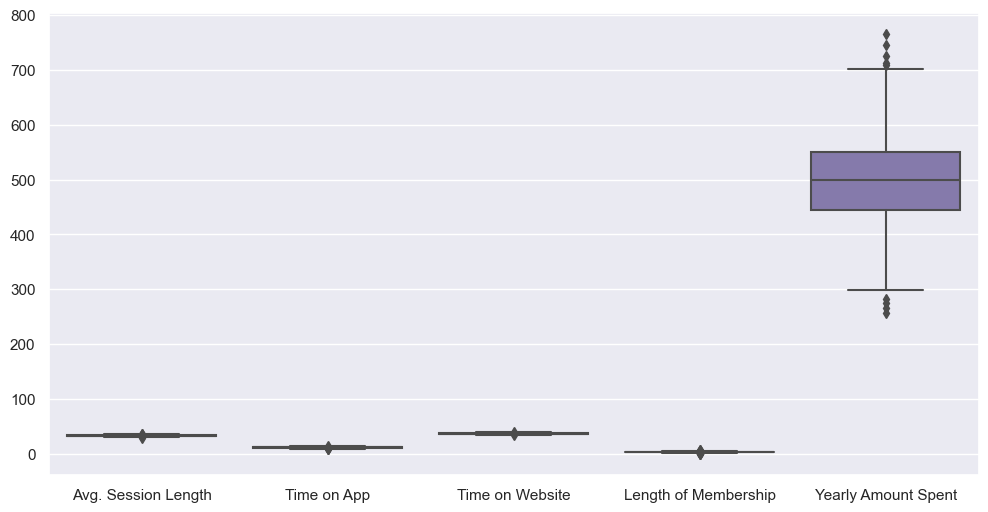

In [55]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data);

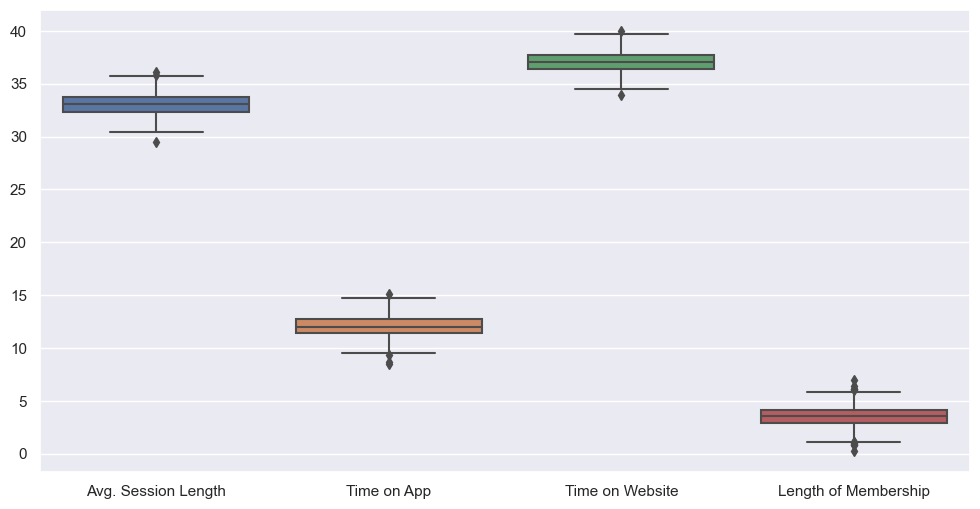

In [56]:
# 특성들만 다시 boxplot

plt.figure(figsize=(12, 6))
sns.boxplot(data=data.iloc[:, :-1]);

<Axes: >

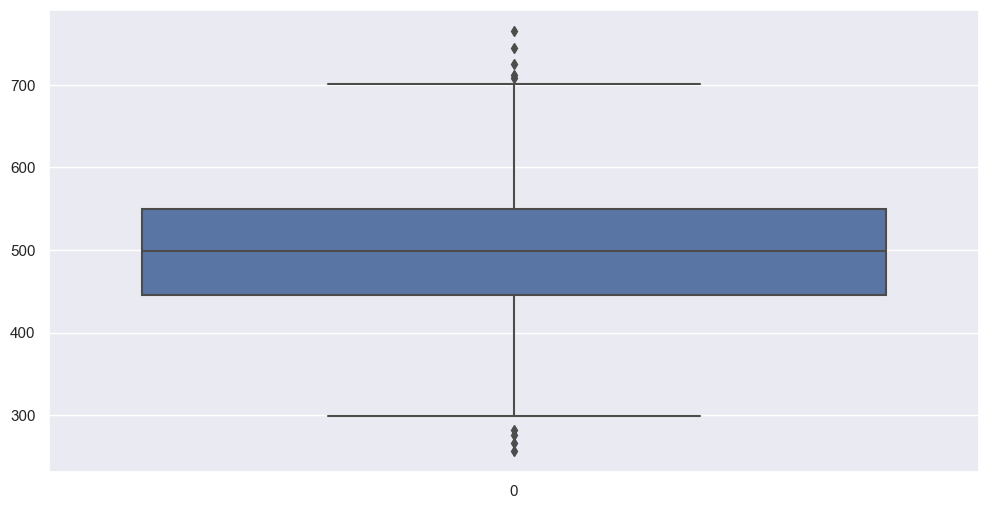

In [58]:
# label 값 boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data['Yearly Amount Spent'])

<Figure size 1200x600 with 0 Axes>

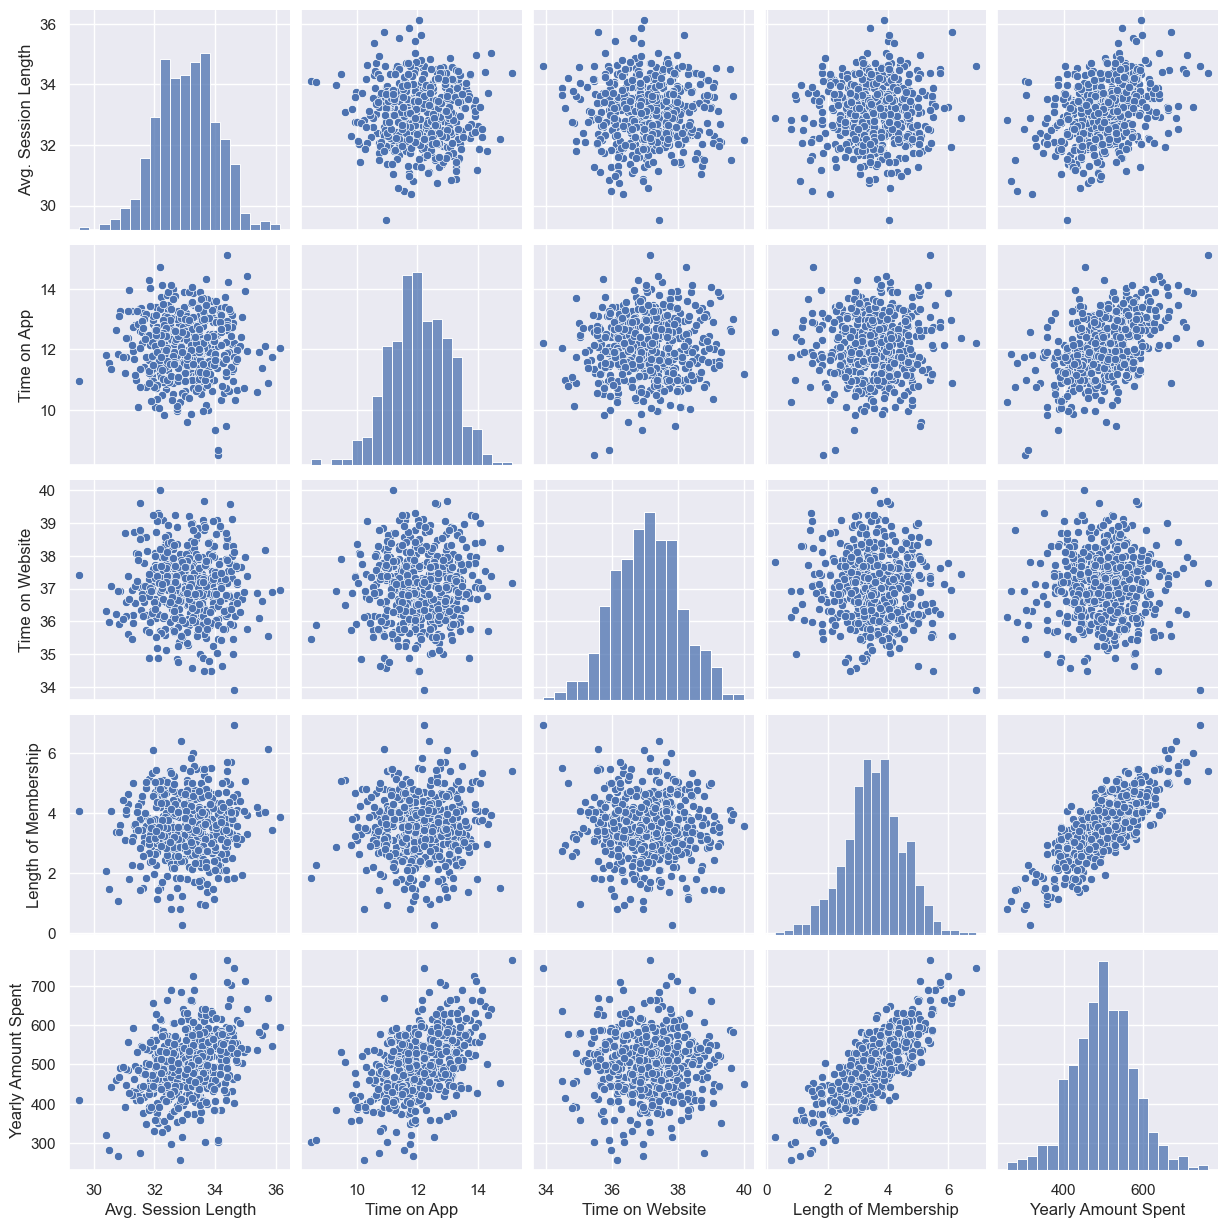

In [60]:
# pairplot
plt.figure(figsize=(12, 6))
sns.pairplot(data=data);

--> length of membership, yearly amount spent 만 상관 있어보임

<Figure size 1200x600 with 0 Axes>

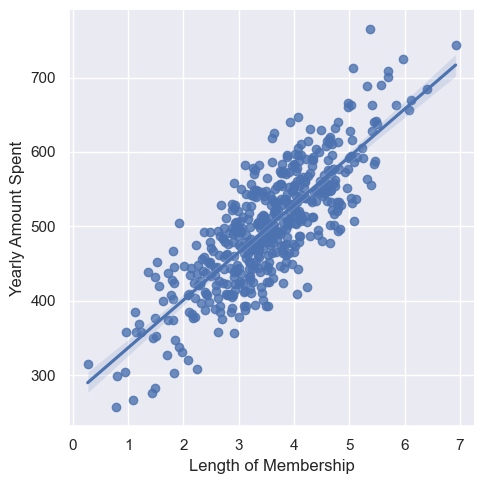

In [61]:
# lmplot
plt.figure(figsize=(12, 6))
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=data);

In [77]:
# 상관이 높은 멤버쉽 유지기간만 가지고 통계적 회귀
import statsmodels.api as sm

X = data['Length of Membership']
y = data['Yearly Amount Spent']
lm = sm.OLS(y, X).fit()

In [65]:
# 회귀 리포트
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.970
Model:                             OLS   Adj. R-squared (uncentered):              0.970
Method:                  Least Squares   F-statistic:                          1.617e+04
Date:                 Wed, 25 Oct 2023   Prob (F-statistic):                        0.00
Time:                         16:04:19   Log-Likelihood:                         -2945.2
No. Observations:                  500   AIC:                                      5892.
Df Residuals:                      499   BIC:                                      5897.
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Length of Membership   135.6117      1.067    127.145      0.000     133.516     137.707
==============================================================================
Omnibus:                        1.408   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                1.472
Skew:                           0.125   Prob(JB):                        0.479
Kurtosis:                       2.909   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

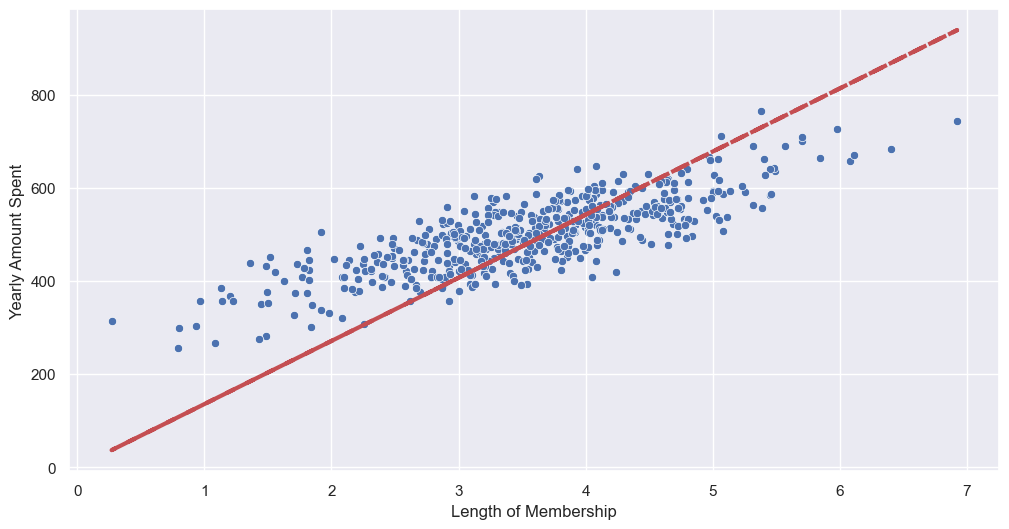

In [66]:
# 회귀 모델 그려보기
pred = lm.predict(X)

sns.scatterplot(x=X, y=y)
plt.plot(X, pred, 'r', ls='dashed', lw=3)

--> 상수항 없어서 그럼

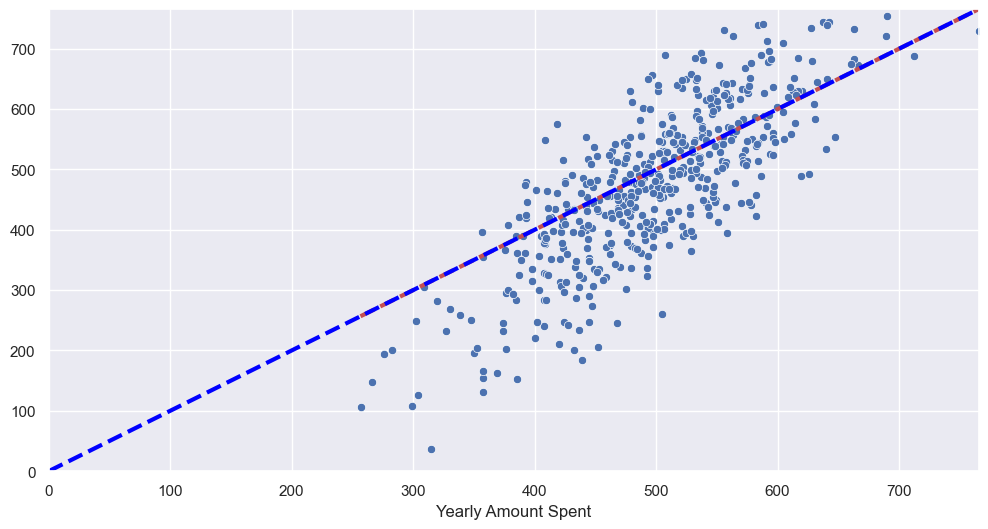

In [73]:
sns.scatterplot(x=y, y=pred)
plt.plot([min(y), max(y)], [min(y), max(y)], 'r', ls='dashed', lw=3)  # 아까 그린 성
plt.plot([0, max(y)], [0, max(y)], 'blue', ls='dashed', lw=3)  # (0, 0) 부터 그린 선
plt.axis([0, max(y), 0, max(y)]);

In [78]:
# 상수항 넣어주기
# numpy 열 추가: c_
X = np.c_[X, [1]*len(X)]
X[:5]

array([[4.08262063, 1.        ],
       [2.66403418, 1.        ],
       [4.1045432 , 1.        ],
       [3.12017878, 1.        ],
       [4.44630832, 1.        ]])

In [79]:
# model fit
# const(상수) 잡힘, R-squared 작아짐, AIC 낮아짐(=좋아짐)
lm = sm.OLS(y, X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.655
Model:                             OLS   Adj. R-squared:                  0.654
Method:                  Least Squares   F-statistic:                     943.9
Date:                 Wed, 25 Oct 2023   Prob (F-statistic):          4.81e-117
Time:                         16:13:27   Log-Likelihood:                -2629.9
No. Observations:                  500   AIC:                             5264.
Df Residuals:                      498   BIC:                             5272.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            64.2187      2.090     30.723      0.000      60.112      68.326
const        272.3998      7.675     35.492      0.000     257.320     287.479
==============================================================================
Omnibus:                        1.092   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                1.122
Skew:                           0.037   Prob(JB):                        0.571
Kurtosis:                       2.780   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

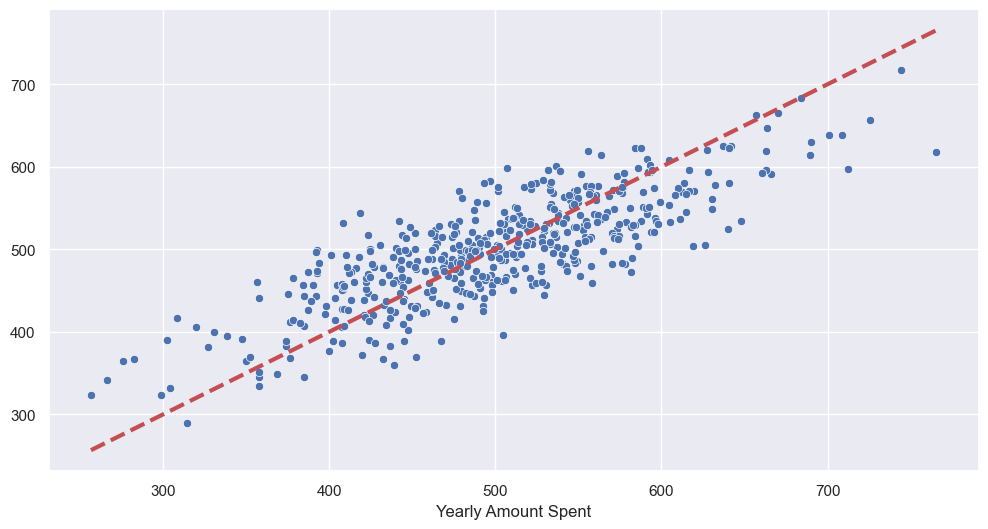

In [80]:
pred = lm.predict(X)

sns.scatterplot(x=y, y=pred)
plt.plot([min(y), max(y)], [min(y), max(y)], 'r', ls='dashed', lw=3)

In [82]:
# 데이터 분리해서 평가
from sklearn.model_selection import train_test_split

X = data.drop('Yearly Amount Spent', axis=1)
y = data['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

* train 데이터로 학습

In [83]:
# 네 개 column을 모두 변수로 보고 회귀
lm = sm.OLS(y_train, X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.998
Model:                             OLS   Adj. R-squared (uncentered):              0.998
Method:                  Least Squares   F-statistic:                          4.884e+04
Date:                 Wed, 25 Oct 2023   Prob (F-statistic):                        0.00
Time:                         16:18:51   Log-Likelihood:                         -1816.5
No. Observations:                  400   AIC:                                      3641.
Df Residuals:                      396   BIC:                                      3657.
Df Model:                            4                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Avg. Session Length     12.0166      0.832     14.440      0.000      10.381      13.653
Time on App             35.2145      1.129     31.197      0.000      32.995      37.434
Time on Website        -14.4797      0.774    -18.715      0.000     -16.001     -12.959
Length of Membership    60.7148      1.151     52.742      0.000      58.452      62.978
==============================================================================
Omnibus:                        0.449   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.799   Jarque-Bera (JB):                0.571
Skew:                          -0.038   Prob(JB):                        0.752
Kurtosis:                       2.832   Cond. No.                         54.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* test 데이터로 확인

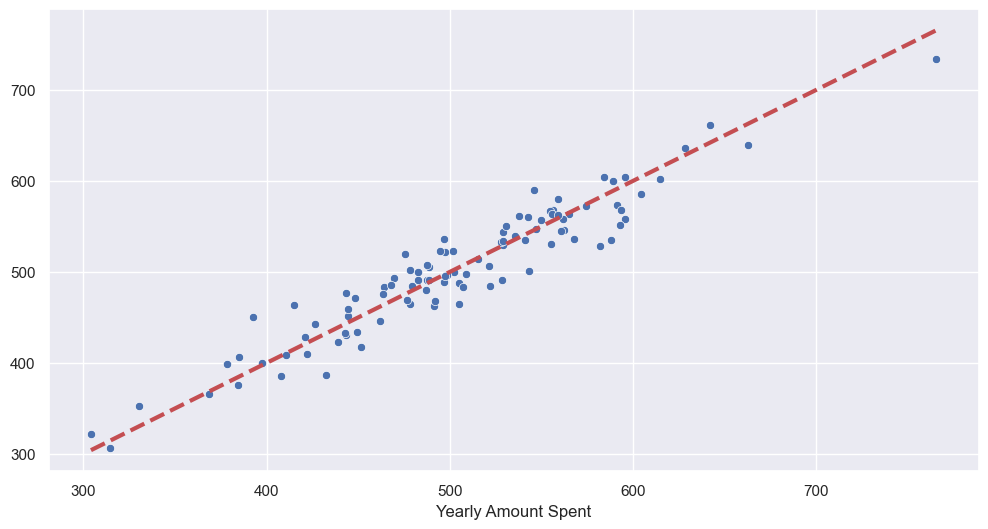

In [84]:
# 참값 vs 예측값

pred = lm.predict(X_test)

sns.scatterplot(x=y_test, y=pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', ls='dashed', lw=3)